Fase 1: Exploración y Limpieza


1. Exploración inicial:

Identificar valores nulos, atípicos o problemas en los datos.
Obtener estadísticas básicas de las columnas.
Unir los dos datasets de manera eficiente usando Loyalty Number.

In [4]:
import pandas as pd

# Mostramos los datos desde los  CSV
customer_flight_df = pd.read_csv("Customer_Flight_Activity.csv")

loyalty_history_df = pd.read_csv("Customer_Loyalty_History.csv")

# Mostramos las primeras filas de cada DataFrame, he probado con el comando ,sep=';') pero sigue saliendo desconfigurado!!!!
print(customer_flight_df.head())
print(loyalty_history_df.head())



   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                            0  
2                            0  
3             

In [5]:
# Customer Flight Activity : Loyalty Number es el ID de cliente. No encuentro valores nulos
# Customer Loyalty History : Loyalty Number es el ID de cliente. Hay valores nulos: Salary, faltan algunos y Cancellation Year y Cancellation Month,no hay sin cancelación.


# Unimos los datasets : usamos la coumna Loyalty Number como clave - inner join nos permite incluir los registros de ambos datasets.

merged_df = pd.merge(customer_flight_df, loyalty_history_df, on="Loyalty Number", how="inner")

# Vemos las primeras filas del dataset unido
print(merged_df.head())




   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  ... Education   Salary Marital Status  \
0                            0  ...  Bachelor  92552.0        Married   


In [6]:


# Vemos estructura y valores nulos del dataset unido

print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

2. Limpieza de datos:

Tratar valores nulos y asegurar consistencia en los datos.
Convertir tipos de datos si es necesario.

In [7]:
# Las columnas con valores nulos son: Salary, Cancellation Year y Cancellation Month
# Rellenaremos Salary con la mediana
# Mantenemos nulos en Cancellation Year y Cancellation Month (son clientes que no cancelaron)

In [9]:
# Calcular la mediana de Salary
salary_median = loyalty_history_df['Salary'].median()

print(f"Mediana de Salary: {salary_median}")



Mediana de Salary: 73455.0


In [10]:
# Rellenamos valores nulos con esa mediana

loyalty_history_df['Salary'].fillna(salary_median, inplace=True)


/var/folders/3m/9ql_23sd72n0zqg5h9188jqw0000gn/T/ipykernel_1201/3739528808.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loyalty_history_df['Salary'].fillna(salary_median, inplace=True)


In [11]:
# Vemos si aún quedan valores nulos

salary_nulls = loyalty_history_df['Salary'].isnull().sum()
print(f"Valores nulos que quedan en Salary: {salary_nulls}")


Valores nulos que quedan en Salary: 0


In [12]:
# Reemplazamos valores negativos en columna Salary con la mediana

loyalty_history_df.loc[loyalty_history_df['Salary'] < 0, 'Salary'] = salary_median


In [13]:
# Vemos estadísticas después de la corrección

salary_stats = loyalty_history_df['Salary'].describe()
print("Estadísticas de Salary después de la corrección:")
print(salary_stats)


Estadísticas de Salary después de la corrección:
count     16737.000000
mean      77909.603095
std       30098.860146
min       15609.000000
25%       63991.000000
50%       73455.000000
75%       82940.000000
max      407228.000000
Name: Salary, dtype: float64


Fase 2: VISUALIZACIÓN


In [ ]:
# Distribución mensual de vuelos reservados durante un año
# Relación entre distancia volada y puntos acumulados.
# Distribución de clientes por provincia o estado.
# Comparación de salario promedio según nivel educativo.
# Proporción de clientes según tipo de tarjeta de lealtad.
# Distribución de clientes según estado civil y género.


1 Distribución mensual de vuelos reservados durante un año 


In [20]:
# Usamos un gráfico de barras para representar los vuelos reservados (Flights Booked) por mes (Month).

import matplotlib.pyplot as plt



In [15]:
# Agrupar los datos por mes y calcular el total de vuelos reservados

monthly_flights = customer_flight_df.groupby('Month')['Flights Booked'].sum()



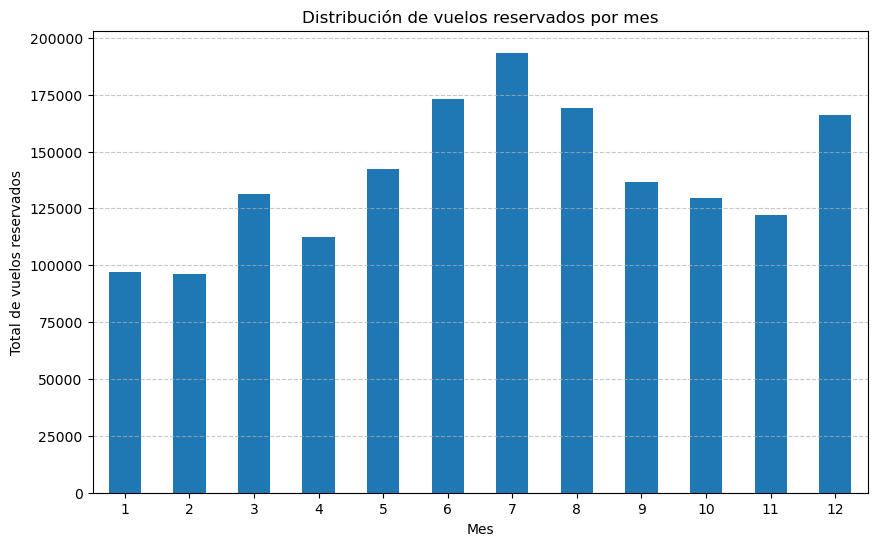

In [19]:

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
monthly_flights.plot(kind='bar')
plt.title("Distribución de vuelos reservados por mes")
plt.xlabel("Mes")
plt.ylabel("Total de vuelos reservados")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


2 Relación entre distancia volada y puntos acumulados.


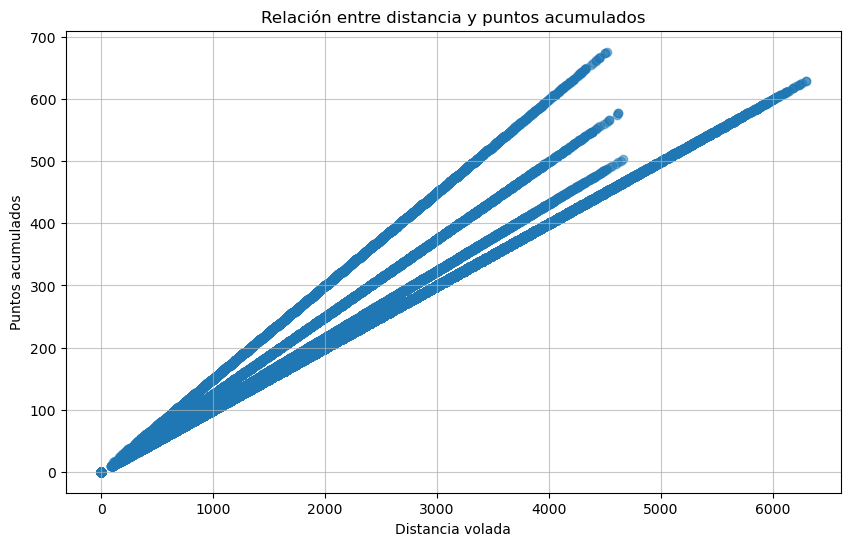

In [21]:
# Usaremos un gráfico de dispersión (scatter plot) para analizar la relación entre Distance y Points Accumulated.


plt.figure(figsize=(10, 6))
plt.scatter(customer_flight_df['Distance'], customer_flight_df['Points Accumulated'], alpha=0.5)
plt.title("Relación entre distancia y puntos acumulados")
plt.xlabel("Distancia volada")
plt.ylabel("Puntos acumulados")
plt.grid(alpha=0.7)
plt.show()

3: ¿Cuál es la distribución de los clientes por provincia o estado?

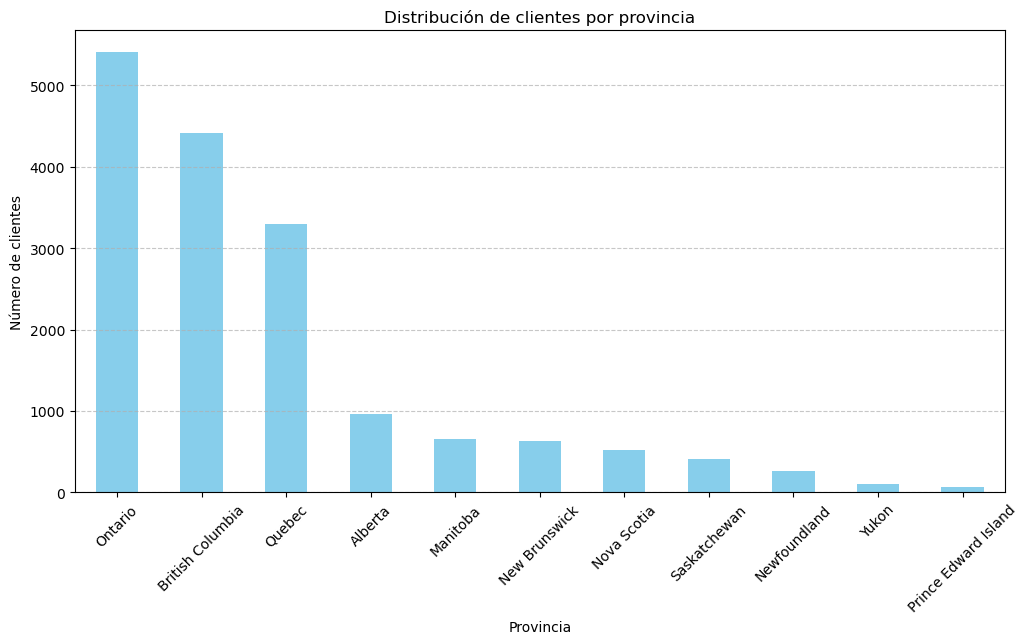

In [22]:
# Usaremos un gráfico de barras para mostrar la distribución de clientes por Province.

# Agrupar por provincia y contar el número de clientes
province_distribution = loyalty_history_df['Province'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
province_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribución de clientes por provincia")
plt.xlabel("Provincia")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



4: ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes? 


In [23]:
# Usaemos un gráfico de barras para comparar el promedio de Salary por Education.

# Primero Calculamos el salario promedio por nivel educativo
education_salary = loyalty_history_df.groupby('Education')['Salary'].mean()



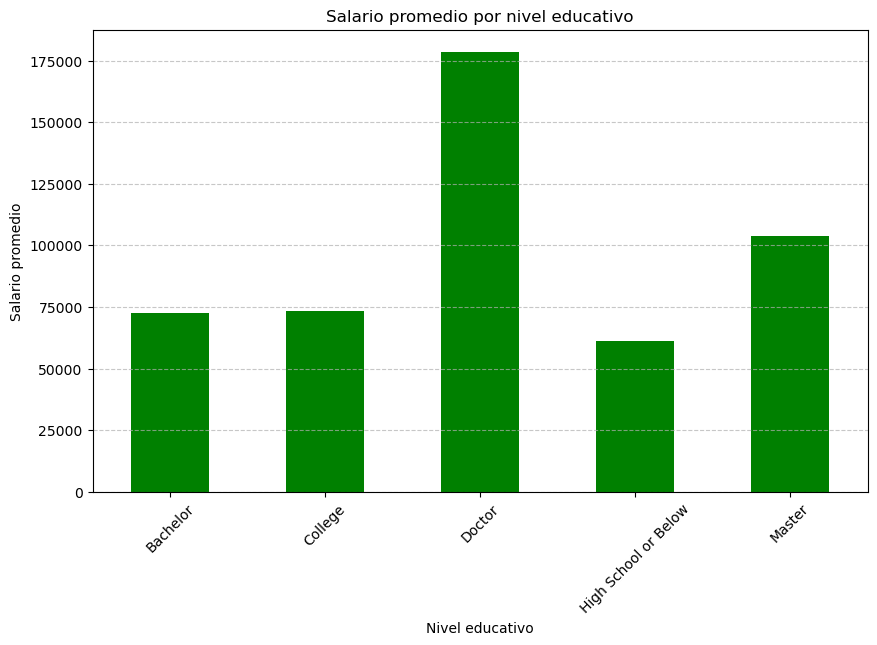

In [24]:
plt.figure(figsize=(10, 6))
education_salary.plot(kind='bar', color='green')
plt.title("Salario promedio por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5: ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [25]:
# Usamos un gráfico circular (pie chart) para visualizar la proporción de clientes por Loyalty Card.

# Contar clientes por tipo de tarjeta
loyalty_card_distribution = loyalty_history_df['Loyalty Card'].value_counts()


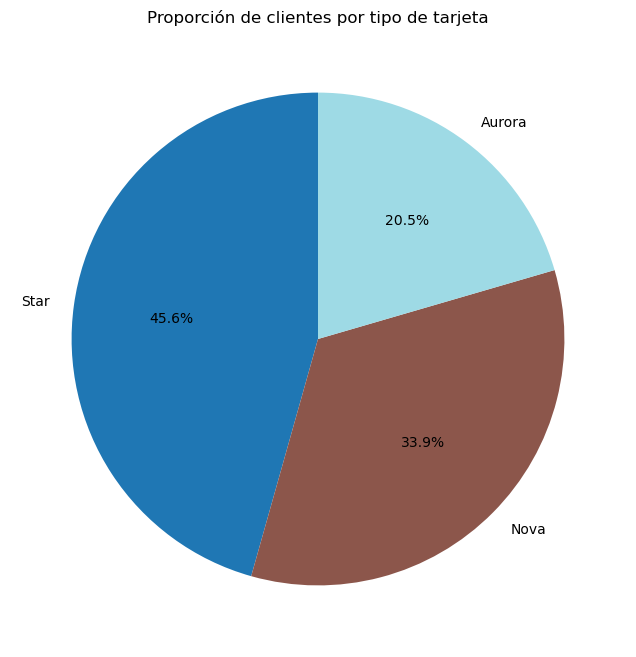

In [27]:
# Creamos un gráfico de pastel
plt.figure(figsize=(8, 8))
loyalty_card_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20')
plt.title("Proporción de clientes por tipo de tarjeta")
plt.ylabel("")  # Ocultar el eje y
plt.show()

6: ¿Cómo se distribuyen los clientes según su estado civil y género?

In [ ]:
# Usaremos un gráfico de barras agrupado para mostrar la combinación de Marital Status y Gender.

In [29]:
# Crearmos una tabla cruzada entre estado civil y género
gender_marital_status = pd.crosstab(loyalty_history_df['Marital Status'], loyalty_history_df['Gender'])


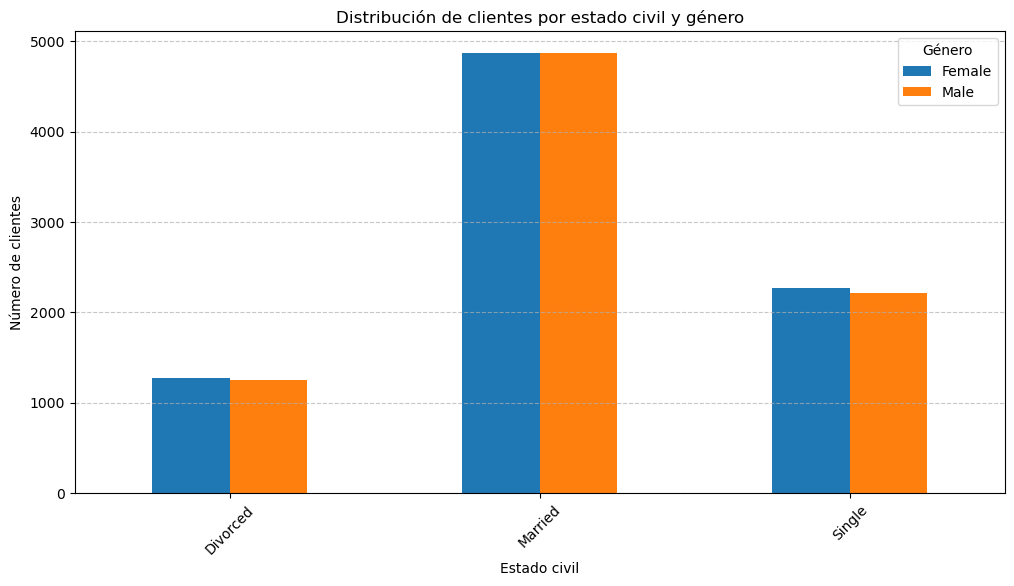

In [30]:
# Crearmos un gráfico de barras agrupado
gender_marital_status.plot(kind='bar', figsize=(12, 6))
plt.title("Distribución de clientes por estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 
